<a href="https://colab.research.google.com/github/Vikas-KM/tensorflow-learning/blob/master/model_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
inputs = keras.Input(shape=(8,), name='input_layer')

In [3]:
x = keras.layers.Dense(12,activation='relu')(inputs)

In [4]:
x = keras.layers.Dense(8, activation='relu')(x)

In [5]:
outputs = keras.layers.Dense(5)(x)

In [6]:
model = keras.Model(inputs=inputs, outputs=outputs, name='model_layers')

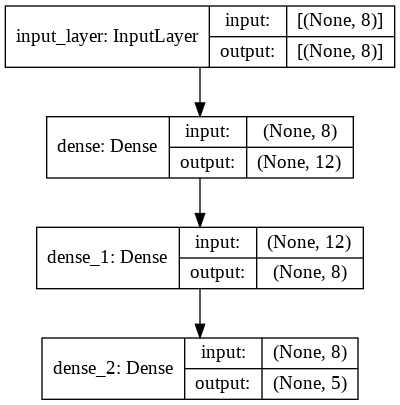

In [7]:
keras.utils.plot_model(model, 'model_layers.png', show_shapes=True)

In [8]:
class MyModel(tf.keras.Model):
  def __init__(self, use_dp=False, num_output=1):
    super(MyModel, self).__init__()
    self.use_dp = use_dp
    self.dense1 = tf.keras.layers.Dense(12, activation=tf.nn.relu)
    self.dense2 = tf.keras.layers.Dense(24, activation=tf.nn.relu)
    self.dense3 = tf.keras.layers.Dense(4, activation='relu')
    self.dense4 = tf.keras.layers.Dense(10, activation='sigmoid')

    if self.use_dp:
      use_dp = tf.keras.layers.Dropout(0.3)


  def call(self, x):
    x = self.dense1(x)
    x = self.dense2(x)
    if self.use_dp:
      x = self.dp(x)
    x = self.dense3(x)
    if self.use_dp:
      x = self.dp(x)
    return self.dense4(x)

In [9]:
model = MyModel()

In [10]:
model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [11]:
class MyLayer(tf.keras.layers.Layer):
  def __init__(self, output_dim, **kwargs):
    self.output_dim = output_dim
    super(MyLayer, self).__init__(**kwargs)

  def build(self, input_shape):
    self.W = self.add_weight(name='kernel', 
                             shape=(input_shape[1], self.output_dim),
                             initializer='uniform',
                             trainable=True)
    self.built = True

  def call(self,x):
    return tf.matmul(x, self.W)

  def compute_output_shape(self, input_shape):
    return(input_shape[0], self.output_dim)

In [12]:
MyLayer(10)